 # Data Pre_Processing:

### Import Packages:-

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings


In [2]:
data_path = r"D:\Data Science\MachineLearning\Project\UnderProcessProject\Mlops_Project2_US_Visa_Approval_Prediction\notebook\Visadataset.csv"

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.shape

(25480, 12)

# Cleaning:

### 1.Handele Missing Values 
### 2.Handele Duplicate Values 
### 3.Check Data Type 


In [1]:
#Check Null Value:
df.isnull().sum().to_frame()

NameError: name 'df' is not defined

##### No Null Value In Data

In [8]:
#Check Duplicate:-
df[df.duplicated()]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


##### No Duplicate Value In Data

In [9]:
df.drop(columns=['case_id'] ,inplace=True )

In [10]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# FEATURE ENGINEERING:-

In [13]:
from datetime import date 
todays_date = date.today()
current_year = todays_date.year

In [16]:
df['company_age'] = current_year - df['yr_of_estab'] 

In [17]:

df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [18]:
df.drop(columns=['yr_of_estab'] ,inplace=True)

## Types Of Features:-

In [20]:
numerical_features = df.select_dtypes(exclude='object').columns.to_list()
categorical_features = df.select_dtypes(include='object').columns.to_list()

In [22]:
len(categorical_features)

8

In [23]:
descrete_feature = [col for col in numerical_features if len(df[col].unique())<=25]
descrete_feature

[]

In [24]:
continious_feature = [col for col in numerical_features if len(df[col].unique())>25]
continious_feature

['no_of_employees', 'prevailing_wage', 'company_age']

### Split in Dependent and Independent Variable:-


In [26]:
X = df.drop(columns=['case_status'])
y = df[['case_status']]

# Transformation Of Data:-

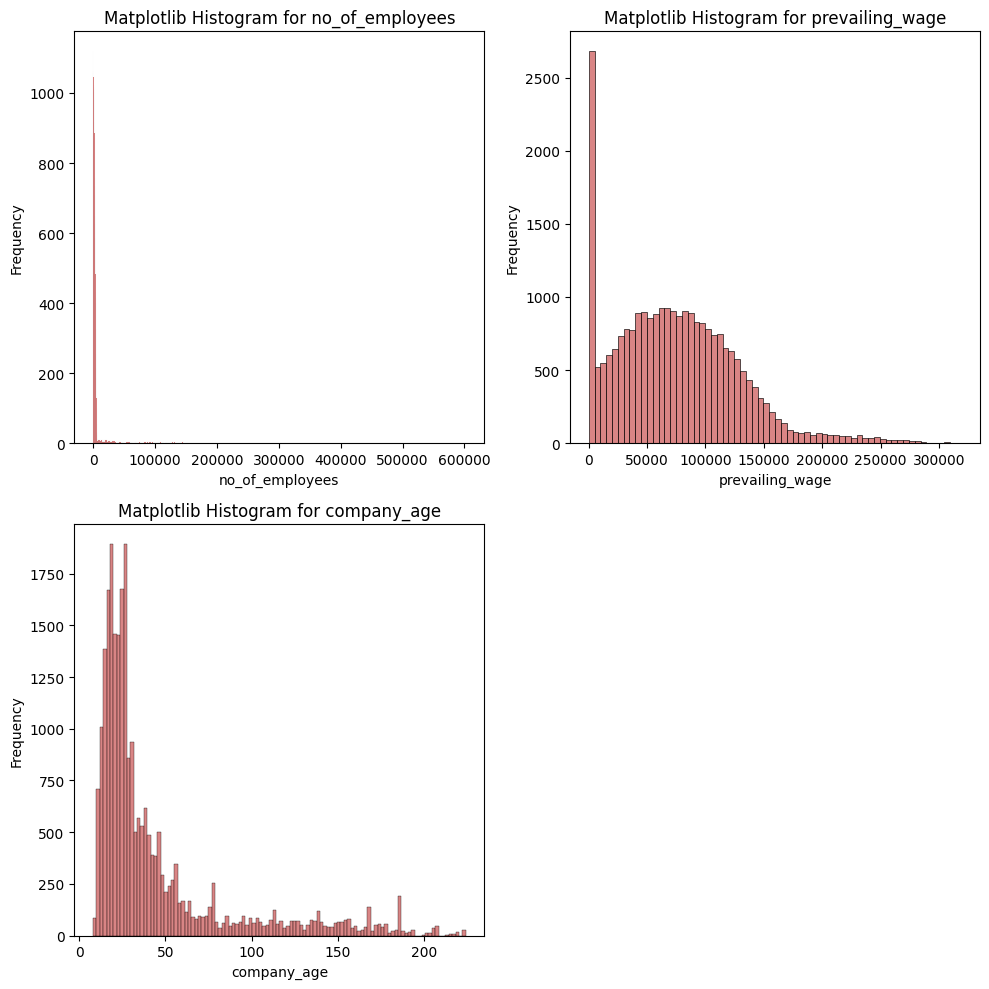

In [36]:
plt.figure(figsize=(10, 10))
for i in range(0, len(numerical_features)):
    plt.subplot(2,2,i+1)
    column = numerical_features[i]
    sns.histplot(data=df[column], edgecolor='black' , color='indianred')
    plt.title(f'Matplotlib Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()


In [37]:
# Check Skewness
X[continious_feature].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

#### Skewness:-
1. no_of_employees ,company_age  we have to handle these column

we use power transformation technique for dealing with it

In [38]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_feature = ['no_of_employees' ,'company_age']
X_copy = pt.fit_transform(X[transform_feature])

In [46]:
X_copy = pd.DataFrame(X_copy ,columns=transform_feature)

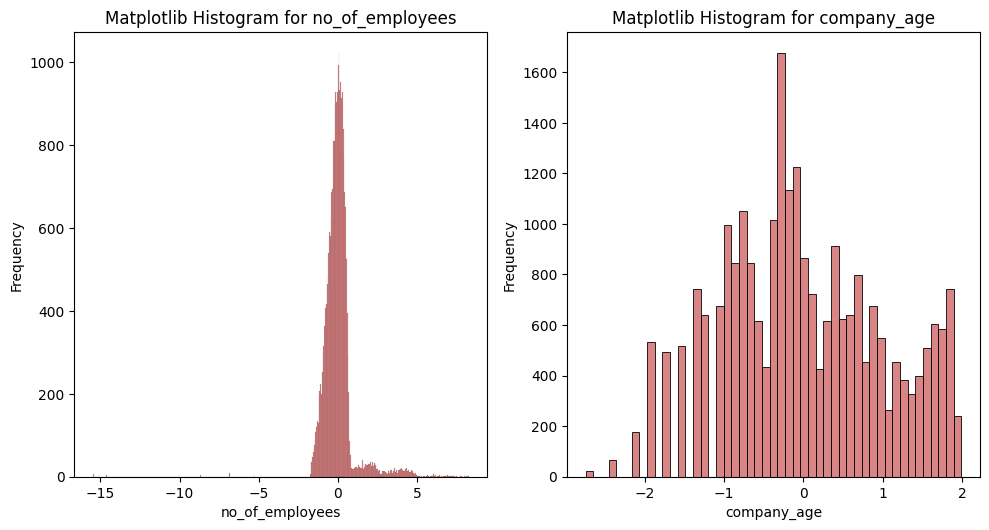

In [47]:
plt.figure(figsize=(10, 10))
for i in range(0, len(transform_feature)):
    plt.subplot(2,2,i+1)
    column = transform_feature[i]
    sns.histplot(data=X_copy[column], edgecolor='black' , color='indianred')
    plt.title(f'Matplotlib Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()


In [48]:

# Check Skewness
X_copy[transform_feature].skew(axis=0, skipna=True)

no_of_employees    0.399339
company_age        0.103264
dtype: float64

#### With Help Of 'yeo-johnson' method we are able to handle Skewness

In [54]:
for col in categorical_features:
    print(col ,":" , df[col].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


## Feature Encoding and Scaling

In [69]:
numerical_features 

['no_of_employees', 'prevailing_wage', 'company_age']

In [74]:
categorical_features[:-1]

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position']

In [76]:
for col in categorical_features[:-1]:
    print(col, ":" , X[col].unique())

continent : ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
education_of_employee : ['High School' "Master's" "Bachelor's" 'Doctorate']
has_job_experience : ['N' 'Y']
requires_job_training : ['N' 'Y']
region_of_employment : ['West' 'Northeast' 'South' 'Midwest' 'Island']
unit_of_wage : ['Hour' 'Year' 'Week' 'Month']
full_time_position : ['Y' 'N']


1. We have to use Ordinal Encoder On Some column --['education_of_employee' ,'has_job_experience', 'requires_job_training' ,'full_time_position'] 
2. We can use ordinal encoding for --['continent' ,'region_of_employment' ,'unit_of_wage' ]

In [78]:
# Create Column Transformer with 3 types of transformers
ordinal_encoder_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
one_hot_encoder_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

In [59]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

In [97]:
tranform_pipeline = Pipeline(
    steps=[
        ("transformer" ,PowerTransformer(method='yeo-johnson')) ,
        ('scaler', StandardScaler(with_mean=False))
    ]
)


ordinal_pipeline = Pipeline(
    steps=[
        ("ordinal_encoder" , OrdinalEncoder()) ,
        ('scaler', StandardScaler(with_mean=False))
    ]
)


one_hot_pipeline = Pipeline(
    steps=[
        ('onehot_encoder' ,OneHotEncoder(handle_unknown='ignore')) ,
        ('scaler', StandardScaler(with_mean=False))
    ]
)


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder" , one_hot_pipeline , one_hot_encoder_columns) ,
        ("OrdinalEncoder" , ordinal_pipeline ,ordinal_encoder_columns) ,
        ("transormer" , tranform_pipeline ,transform_columns)
    ]
)

In [99]:
X = preprocessor.fit_transform(X)

In [101]:
X

array([[ 0.        ,  2.11363173,  0.        , ...,  1.4868464 ,
         1.51729976, -0.95216153],
       [ 0.        ,  2.11363173,  0.        , ...,  2.23026959,
         0.03091211, -0.46294171],
       [ 0.        ,  2.11363173,  0.        , ...,  0.        ,
         2.88507606, -1.07581951],
       ...,
       [ 0.        ,  2.11363173,  0.        , ...,  2.23026959,
        -0.41388512,  1.54744459],
       [ 0.        ,  2.11363173,  0.        , ...,  2.23026959,
        -0.11194883,  1.68383399],
       [ 0.        ,  2.11363173,  0.        , ...,  0.        ,
         0.21874168,  1.0229662 ]])

# Classification:-

In [103]:
y = np.where(y == 'Denied', 1, 0)

sampling_strategy: 'minority' means only the minority class will be oversampled to match the majority class.

In [105]:

from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling(Oversampling) the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

### Train_test_split:-


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12769, 21), (3193, 21))

## Model Selection And Training:-

In [108]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

In [109]:

def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [110]:
models = {
    "RandomForestClassifier" : RandomForestClassifier() ,
    "DecisionTreeClassifier" : DecisionTreeClassifier() ,
    "GradientBoostingClassifier" : GradientBoostingClassifier() ,
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [111]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [112]:

base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

RandomForestClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9740
- F1 score: 0.9755
- Precision: 0.9695
- Recall: 0.9816
- Roc Auc Score: 0.9736


DecisionTreeClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9421
- F1 score: 0.9455
- Precision: 0.9370
- Recall: 0.9542
- Roc Auc Score: 0.9414


GradientBoostingClassifier
Model performance for Training set
- Accuracy: 0.8985
- F1 score: 0.9005
- Precision: 0.9125
- Recall: 0.8888
- Roc Auc Score: 0.8988
----------------------------------
Model performance for Test set
- Accuracy: 0.8988
- F1 score: 0.9034
- Precision: 0.9086
- Recall: 0.8983
- Roc Auc Score: 0.8989


Logistic Regression
Mode

d:\Data Science\MachineLearning\Project\UnderProcessProject\Mlops_Project2_US_Visa_Approval_Prediction\mlopsvenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8679
- F1 score: 0.8723
- Precision: 0.8713
- Recall: 0.8733
- Roc Auc Score: 0.8677
----------------------------------
Model performance for Test set
- Accuracy: 0.8822
- F1 score: 0.8891
- Precision: 0.8823
- Recall: 0.8960
- Roc Auc Score: 0.8815




In [113]:
base_model_report

,Model Name,Accuracy
0,RandomForestClassifier,0.974006
5,XGBClassifier,0.947072
4,K-Neighbors Classifier,0.942374
1,DecisionTreeClassifier,0.942061
2,GradientBoostingClassifier,0.898841
7,AdaBoost Classifier,0.882242
6,Support Vector Classifier,0.834012
3,Logistic Regression,0.752584


### We will use RandomForestClassifier ,XGBClassifier ,K-Neighbors Classifier for Hyperparameter tuning:-

In [114]:
# rf_param_grid = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [115]:

from sklearn.model_selection import RandomizedSearchCV

In [129]:

# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [136]:
model_param = {}
for name ,model ,params in randomcv_models:
    model = model 
    random_cv = RandomizedSearchCV(
        estimator=model , param_distributions= params , n_iter= 100 , cv=3 ,verbose= True ,n_jobs= -1
    )
    random_cv.fit(X_res ,y_res)
    model_param[name] = random_cv.best_params_
    
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])
    

d:\Data Science\MachineLearning\Project\UnderProcessProject\Mlops_Project2_US_Visa_Approval_Prediction\mlopsvenv\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits


d:\Data Science\MachineLearning\Project\UnderProcessProject\Mlops_Project2_US_Visa_Approval_Prediction\mlopsvenv\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits


d:\Data Science\MachineLearning\Project\UnderProcessProject\Mlops_Project2_US_Visa_Approval_Prediction\mlopsvenv\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}


In [141]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}}

## Retraining the Model with best Parameters

In [138]:

from sklearn.metrics import roc_auc_score,roc_curve
updated_models = {
    "RandomForestClassifier" : RandomForestClassifier(**model_param['RF']) ,
    "KNeighborsClassifier" : KNeighborsClassifier(**model_param['KNN']) ,
    'XGBClassifier' : XGBClassifier(**model_param['XGBoost']) 
}
updated_report = evaluate_models(
    X=X_res ,y=y_res , models=updated_models
)

RandomForestClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9724
- F1 score: 0.9740
- Precision: 0.9677
- Recall: 0.9804
- Roc Auc Score: 0.9720


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9775
- F1 score: 0.9788
- Precision: 0.9702
- Recall: 0.9875
- Roc Auc Score: 0.9769


XGBClassifier
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9986
- Precision: 0.9992
- Recall: 0.9980
- Roc Auc Score: 0.9986
----------------------------------
Model performance for Test set
- Accuracy: 0.9565
- F1 score: 0.9588
- Precision: 0.9557
- Recall: 0.9620
- Roc Auc Score: 0.9562




In [139]:
updated_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.977451
0,RandomForestClassifier,0.972440
2,XGBClassifier,0.956467


### So we got Best Model :KNeighborsClassifier 

In [142]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9775
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1511
           1       0.97      0.99      0.98      1682

    accuracy                           0.98      3193
   macro avg       0.98      0.98      0.98      3193
weighted avg       0.98      0.98      0.98      3193



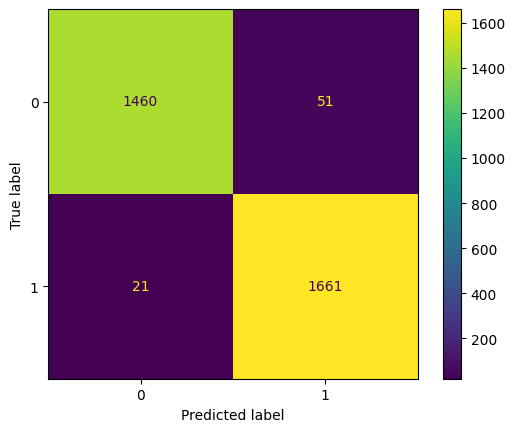

In [143]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)


## Best Model is K-Nearest Neighbor(KNN) with Accuracy 97.75%